### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("resources/data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN'],1).drop(['NAME'],1)
application_df

/Users/yycheung/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
list = application_df.dtypes.index.tolist()
application_df[list].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_count = application_df['APPLICATION_TYPE'].value_counts()
app_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

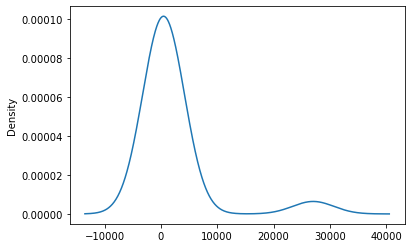

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = app_count[app_count<500].index.to_list()

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification = application_df['CLASSIFICATION'].value_counts()
classification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

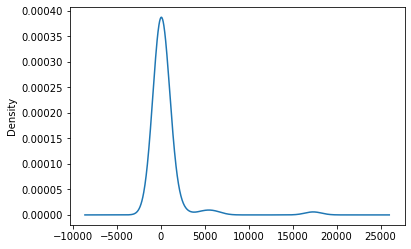

In [8]:
# Visualize the value counts of CLASSIFICATION
classification.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = classification[classification<1700].index.to_list()

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
cat_list = application_df.dtypes[application_df.dtypes=='object'].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df=pd.DataFrame(enc.fit_transform(application_df[cat_list]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat_list)
encode_df.head()

/Users/yycheung/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)

application_df=application_df.drop(cat_list,1)

/Users/yycheung/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [13]:
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
X=application_df.drop(['IS_SUCCESSFUL'],1)
y=application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/Users/yycheung/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
X_train_scaled.shape[1]

43

### Deliverable 2: Compile, Train and Evaluate the Model

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train_scaled.shape[1]
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 40
#hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
                            input_dim=number_input_features,
                            activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,
                            activation='relu'))

# Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,
#                                 activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,
                            activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               4400      
                                                                 
 dense_8 (Dense)             (None, 40)                4040      
                                                                 
 dense_9 (Dense)             (None, 1)                 41        
                                                                 
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [31]:
# Create a callback that saves the model's weights
checkpoint_path = 'resources/data/callback'
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5)

In [32]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=20, callbacks=[callback])

Epoch 1/20
  1/804 [..............................] - ETA: 6:41 - loss: 1500.6356 - accuracy: 0.4688
Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback
 15/804 [..............................] - ETA: 3s - loss: 405542.1875 - accuracy: 0.5125
Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback
 30/804 [>.............................] - ETA: 3s - loss: 235417.1562 - accuracy: 0.5167
Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback
 45/804 [>.............................] - ETA: 3s - loss: 158760.5625 - accuracy: 0.4993
Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback
 60/804 [=>......................

495/804 [=================>............] - ETA: 1s - loss: 23267.4531 - accuracy: 0.4976
Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback
510/804 [==================>...........] - ETA: 1s - loss: 31726.4941 - accuracy: 0.4985
Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback
525/804 [==================>...........] - ETA: 1s - loss: 32550.9902 - accuracy: 0.4986
Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback
540/804 [===================>..........] - ETA: 1s - loss: 31794.4590 - accuracy: 0.4976
Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback

Epoch 1: saving model to resources/data/callback
555/804 [===================>..........] - ETA: 

196/804 [======>.......................] - ETA: 2s - loss: 3294.5085 - accuracy: 0.4987
Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback
211/804 [======>.......................] - ETA: 2s - loss: 3086.5774 - accuracy: 0.4973
Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback
226/804 [=======>......................] - ETA: 2s - loss: 2891.2617 - accuracy: 0.5047
Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback
241/804 [=======>......................] - ETA: 2s - loss: 2735.4819 - accuracy: 0.5043
Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback
256/804 [========>.....................] - ETA: 1s -


Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback
721/804 [=========================>....] - ETA: 0s - loss: 48534.2266 - accuracy: 0.5087
Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback
736/804 [==========================>...] - ETA: 0s - loss: 48414.2188 - accuracy: 0.5089
Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback
751/804 [===========================>..] - ETA: 0s - loss: 47459.7461 - accuracy: 0.5083
Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callback
766/804 [===========================>..] - ETA: 0s - loss: 46837.0664 - accuracy: 0.5073
Epoch 2: saving model to resources/data/callback

Epoch 2: saving model to resources/data/callbac

417/804 [==============>...............] - ETA: 1s - loss: 7815.2588 - accuracy: 0.4954
Epoch 3: saving model to resources/data/callback

Epoch 3: saving model to resources/data/callback

Epoch 3: saving model to resources/data/callback
432/804 [===============>..............] - ETA: 1s - loss: 32708.4785 - accuracy: 0.4946
Epoch 3: saving model to resources/data/callback

Epoch 3: saving model to resources/data/callback

Epoch 3: saving model to resources/data/callback
447/804 [===============>..............] - ETA: 1s - loss: 39501.6836 - accuracy: 0.4950
Epoch 3: saving model to resources/data/callback

Epoch 3: saving model to resources/data/callback

Epoch 3: saving model to resources/data/callback
462/804 [================>.............] - ETA: 1s - loss: 38485.1133 - accuracy: 0.4930
Epoch 3: saving model to resources/data/callback

Epoch 3: saving model to resources/data/callback

Epoch 3: saving model to resources/data/callback
477/804 [================>.............] - ETA: 1

118/804 [===>..........................] - ETA: 2s - loss: 3759.6792 - accuracy: 0.4690
Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback
133/804 [===>..........................] - ETA: 2s - loss: 3381.4067 - accuracy: 0.4680
Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback
148/804 [====>.........................] - ETA: 2s - loss: 3104.4446 - accuracy: 0.4683
Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback
163/804 [=====>........................] - ETA: 2s - loss: 2903.5330 - accuracy: 0.4695
Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback
178/804 [=====>........................] - ETA: 2s -

633/804 [======================>.......] - ETA: 0s - loss: 26465.4941 - accuracy: 0.4769
Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback
648/804 [=======================>......] - ETA: 0s - loss: 25946.0273 - accuracy: 0.4791
Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback
663/804 [=======================>......] - ETA: 0s - loss: 26183.2305 - accuracy: 0.4801
Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback
678/804 [========================>.....] - ETA: 0s - loss: 26573.6699 - accuracy: 0.4814
Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback

Epoch 4: saving model to resources/data/callback
693/804 [========================>.....] - ETA: 


Epoch 5: saving model to resources/data/callback

Epoch 5: saving model to resources/data/callback
344/804 [===========>..................] - ETA: 1s - loss: 2604.7476 - accuracy: 0.5195
Epoch 5: saving model to resources/data/callback

Epoch 5: saving model to resources/data/callback

Epoch 5: saving model to resources/data/callback
359/804 [============>.................] - ETA: 1s - loss: 3325.6152 - accuracy: 0.5198
Epoch 5: saving model to resources/data/callback

Epoch 5: saving model to resources/data/callback

Epoch 5: saving model to resources/data/callback
374/804 [============>.................] - ETA: 1s - loss: 3208.3870 - accuracy: 0.5207
Epoch 5: saving model to resources/data/callback

Epoch 5: saving model to resources/data/callback

Epoch 5: saving model to resources/data/callback
389/804 [=============>................] - ETA: 1s - loss: 3087.9612 - accuracy: 0.5197
Epoch 5: saving model to resources/data/callback

Epoch 5: saving model to resources/data/callback

E

 45/804 [>.............................] - ETA: 2s - loss: 1737.7986 - accuracy: 0.4903
Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback
 60/804 [=>............................] - ETA: 2s - loss: 1693.4928 - accuracy: 0.4974
Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback
 75/804 [=>............................] - ETA: 2s - loss: 1599.7734 - accuracy: 0.5108
Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback
 90/804 [==>...........................] - ETA: 2s - loss: 4257.2065 - accuracy: 0.5087
Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback
105/804 [==>...........................] - ETA: 2s -

562/804 [===================>..........] - ETA: 0s - loss: 19716.9434 - accuracy: 0.4996
Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback
575/804 [====================>.........] - ETA: 0s - loss: 19276.4492 - accuracy: 0.4990
Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback
590/804 [=====================>........] - ETA: 0s - loss: 18792.2734 - accuracy: 0.4984
Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback
605/804 [=====================>........] - ETA: 0s - loss: 18328.9395 - accuracy: 0.4998
Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback

Epoch 6: saving model to resources/data/callback
620/804 [======================>.......] - ETA: 

271/804 [=========>....................] - ETA: 1s - loss: 1468.3939 - accuracy: 0.5106
Epoch 7: saving model to resources/data/callback

Epoch 7: saving model to resources/data/callback

Epoch 7: saving model to resources/data/callback
286/804 [=========>....................] - ETA: 1s - loss: 1449.4669 - accuracy: 0.5082
Epoch 7: saving model to resources/data/callback

Epoch 7: saving model to resources/data/callback

Epoch 7: saving model to resources/data/callback
301/804 [==========>...................] - ETA: 1s - loss: 1444.7861 - accuracy: 0.5032
Epoch 7: saving model to resources/data/callback

Epoch 7: saving model to resources/data/callback

Epoch 7: saving model to resources/data/callback
316/804 [==========>...................] - ETA: 1s - loss: 1381.5638 - accuracy: 0.5063
Epoch 7: saving model to resources/data/callback

Epoch 7: saving model to resources/data/callback

Epoch 7: saving model to resources/data/callback
331/804 [===========>..................] - ETA: 1s -


Epoch 7: saving model to resources/data/callback
796/804 [============================>.] - ETA: 0s - loss: 1481.8984 - accuracy: 0.5137
Epoch 7: saving model to resources/data/callback
804/804 [==============================] - 3s 4ms/step - loss: 1478.9010 - accuracy: 0.5140
Epoch 8/20
  1/804 [..............................] - ETA: 1s - loss: 10.5823 - accuracy: 0.5938
Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback
 15/804 [..............................] - ETA: 2s - loss: 1197.9270 - accuracy: 0.5104
Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback
 27/804 [>.............................] - ETA: 3s - loss: 2361.0005 - accuracy: 0.5000
Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback
 


Epoch 8: saving model to resources/data/callback
497/804 [=================>............] - ETA: 1s - loss: 1164.2017 - accuracy: 0.4821
Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback
512/804 [==================>...........] - ETA: 1s - loss: 1131.9890 - accuracy: 0.4842
Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback
527/804 [==================>...........] - ETA: 1s - loss: 1102.9556 - accuracy: 0.4836
Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback
542/804 [===================>..........] - ETA: 1s - loss: 1177.1759 - accuracy: 0.4851
Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback

Epoch 8: saving model to resources/data/callback
55

193/804 [======>.......................] - ETA: 2s - loss: 5399.3687 - accuracy: 0.5047
Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback
208/804 [======>.......................] - ETA: 2s - loss: 5010.7275 - accuracy: 0.5065
Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback
223/804 [=======>......................] - ETA: 2s - loss: 4683.2124 - accuracy: 0.5099
Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback
238/804 [=======>......................] - ETA: 2s - loss: 4388.5146 - accuracy: 0.5092
Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback
253/804 [========>.....................] - ETA: 2s -

711/804 [=========================>....] - ETA: 0s - loss: 2502.7070 - accuracy: 0.5188
Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback
723/804 [=========================>....] - ETA: 0s - loss: 2468.0146 - accuracy: 0.5182
Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback
737/804 [==========================>...] - ETA: 0s - loss: 2426.5986 - accuracy: 0.5175
Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback
748/804 [==========================>...] - ETA: 0s - loss: 2432.1113 - accuracy: 0.5177
Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback

Epoch 9: saving model to resources/data/callback
763/804 [===========================>..] - ETA: 0s - loss: 2388.4678 - accuracy: 0.5180
Epoch 9: savin


Epoch 10: saving model to resources/data/callback
410/804 [==============>...............] - ETA: 1s - loss: 14456.9268 - accuracy: 0.5005
Epoch 10: saving model to resources/data/callback

Epoch 10: saving model to resources/data/callback

Epoch 10: saving model to resources/data/callback
424/804 [==============>...............] - ETA: 1s - loss: 14014.1924 - accuracy: 0.4998
Epoch 10: saving model to resources/data/callback

Epoch 10: saving model to resources/data/callback

Epoch 10: saving model to resources/data/callback
439/804 [===============>..............] - ETA: 1s - loss: 14162.8486 - accuracy: 0.4991
Epoch 10: saving model to resources/data/callback

Epoch 10: saving model to resources/data/callback

Epoch 10: saving model to resources/data/callback
454/804 [===============>..............] - ETA: 1s - loss: 13780.6475 - accuracy: 0.4985
Epoch 10: saving model to resources/data/callback

Epoch 10: saving model to resources/data/callback

Epoch 10: saving model to resources

 95/804 [==>...........................] - ETA: 2s - loss: 2801.8350 - accuracy: 0.5132
Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback
110/804 [===>..........................] - ETA: 2s - loss: 8997.2949 - accuracy: 0.5105
Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback
125/804 [===>..........................] - ETA: 2s - loss: 9793.6797 - accuracy: 0.5157
Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback
140/804 [====>.........................] - ETA: 2s - loss: 12701.8682 - accuracy: 0.5156
Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback
155/804 [====>.........................

604/804 [=====================>........] - ETA: 0s - loss: 8596.4248 - accuracy: 0.5017
Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback
615/804 [=====================>........] - ETA: 0s - loss: 8442.9443 - accuracy: 0.5022
Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback
630/804 [======================>.......] - ETA: 0s - loss: 8242.0322 - accuracy: 0.5030
Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback
645/804 [=======================>......] - ETA: 0s - loss: 8051.9502 - accuracy: 0.5031
Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback

Epoch 11: saving model to resources/data/callback
660/804 [=======================>......]

301/804 [==========>...................] - ETA: 1s - loss: 1011.6843 - accuracy: 0.5137
Epoch 12: saving model to resources/data/callback

Epoch 12: saving model to resources/data/callback

Epoch 12: saving model to resources/data/callback
316/804 [==========>...................] - ETA: 1s - loss: 977.3376 - accuracy: 0.5145 
Epoch 12: saving model to resources/data/callback

Epoch 12: saving model to resources/data/callback

Epoch 12: saving model to resources/data/callback
331/804 [===========>..................] - ETA: 1s - loss: 934.6340 - accuracy: 0.5136
Epoch 12: saving model to resources/data/callback

Epoch 12: saving model to resources/data/callback

Epoch 12: saving model to resources/data/callback
346/804 [===========>..................] - ETA: 1s - loss: 898.2924 - accuracy: 0.5135
Epoch 12: saving model to resources/data/callback

Epoch 12: saving model to resources/data/callback

Epoch 12: saving model to resources/data/callback
361/804 [============>.................] -

  1/804 [..............................] - ETA: 1s - loss: 2.7940 - accuracy: 0.5312
Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback
 12/804 [..............................] - ETA: 3s - loss: 23932.9316 - accuracy: 0.4818
Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback
 27/804 [>.............................] - ETA: 3s - loss: 11141.1455 - accuracy: 0.5197
Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback
 42/804 [>.............................] - ETA: 3s - loss: 9525.9238 - accuracy: 0.5186 
Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback
 57/804 [=>............................]


Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback
512/804 [==================>...........] - ETA: 1s - loss: 4258.4019 - accuracy: 0.5071
Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback
527/804 [==================>...........] - ETA: 1s - loss: 4147.3418 - accuracy: 0.5082
Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback
542/804 [===================>..........] - ETA: 1s - loss: 4037.5647 - accuracy: 0.5089
Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/data/callback
557/804 [===================>..........] - ETA: 0s - loss: 3935.4470 - accuracy: 0.5105
Epoch 13: saving model to resources/data/callback

Epoch 13: saving model to resources/dat

208/804 [======>.......................] - ETA: 2s - loss: 308.9561 - accuracy: 0.5135
Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback
223/804 [=======>......................] - ETA: 2s - loss: 339.9524 - accuracy: 0.5099
Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback
238/804 [=======>......................] - ETA: 2s - loss: 320.2062 - accuracy: 0.5125
Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback
253/804 [========>.....................] - ETA: 2s - loss: 303.4636 - accuracy: 0.5151
Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback
268/804 [=========>....................] - E


Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback
728/804 [==========================>...] - ETA: 0s - loss: 525.2527 - accuracy: 0.5226
Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback
743/804 [==========================>...] - ETA: 0s - loss: 522.6877 - accuracy: 0.5236
Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback
758/804 [===========================>..] - ETA: 0s - loss: 533.9733 - accuracy: 0.5222
Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/callback
773/804 [===========================>..] - ETA: 0s - loss: 736.9118 - accuracy: 0.5215
Epoch 14: saving model to resources/data/callback

Epoch 14: saving model to resources/data/ca


Epoch 15: saving model to resources/data/callback

Epoch 15: saving model to resources/data/callback
429/804 [===============>..............] - ETA: 1s - loss: 4295.3271 - accuracy: 0.5174
Epoch 15: saving model to resources/data/callback

Epoch 15: saving model to resources/data/callback

Epoch 15: saving model to resources/data/callback
444/804 [===============>..............] - ETA: 1s - loss: 4167.0742 - accuracy: 0.5179
Epoch 15: saving model to resources/data/callback

Epoch 15: saving model to resources/data/callback

Epoch 15: saving model to resources/data/callback
459/804 [================>.............] - ETA: 1s - loss: 4112.0034 - accuracy: 0.5155
Epoch 15: saving model to resources/data/callback

Epoch 15: saving model to resources/data/callback

Epoch 15: saving model to resources/data/callback
474/804 [================>.............] - ETA: 1s - loss: 3985.6396 - accuracy: 0.5156
Epoch 15: saving model to resources/data/callback

Epoch 15: saving model to resources/dat


Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback
130/804 [===>..........................] - ETA: 2s - loss: 7152.7305 - accuracy: 0.4846
Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback
145/804 [====>.........................] - ETA: 2s - loss: 6695.9766 - accuracy: 0.4879
Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback
160/804 [====>.........................] - ETA: 2s - loss: 6101.2764 - accuracy: 0.4949
Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback
175/804 [=====>........................] - ETA: 2s - loss: 5689.7534 - accuracy: 0.5027
Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/dat

630/804 [======================>.......] - ETA: 0s - loss: 2565.4636 - accuracy: 0.5143
Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback
645/804 [=======================>......] - ETA: 0s - loss: 2533.4514 - accuracy: 0.5145
Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback
660/804 [=======================>......] - ETA: 0s - loss: 2484.4084 - accuracy: 0.5152
Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback
675/804 [========================>.....] - ETA: 0s - loss: 2431.9377 - accuracy: 0.5134
Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback

Epoch 16: saving model to resources/data/callback
690/804 [========================>.....]


Epoch 17: saving model to resources/data/callback
331/804 [===========>..................] - ETA: 1s - loss: 5806.1025 - accuracy: 0.5143
Epoch 17: saving model to resources/data/callback

Epoch 17: saving model to resources/data/callback

Epoch 17: saving model to resources/data/callback
346/804 [===========>..................] - ETA: 1s - loss: 5595.7529 - accuracy: 0.5152
Epoch 17: saving model to resources/data/callback

Epoch 17: saving model to resources/data/callback

Epoch 17: saving model to resources/data/callback
361/804 [============>.................] - ETA: 1s - loss: 5364.9116 - accuracy: 0.5143
Epoch 17: saving model to resources/data/callback

Epoch 17: saving model to resources/data/callback

Epoch 17: saving model to resources/data/callback
376/804 [=============>................] - ETA: 1s - loss: 5157.5474 - accuracy: 0.5135
Epoch 17: saving model to resources/data/callback

Epoch 17: saving model to resources/data/callback

Epoch 17: saving model to resources/dat

 27/804 [>.............................] - ETA: 3s - loss: 135.5295 - accuracy: 0.5035
Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback
 42/804 [>.............................] - ETA: 3s - loss: 423.6533 - accuracy: 0.5179
Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback
 57/804 [=>............................] - ETA: 3s - loss: 580.5498 - accuracy: 0.5000
Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback
 72/804 [=>............................] - ETA: 2s - loss: 855.2058 - accuracy: 0.5004
Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback
 87/804 [==>...........................] - E

537/804 [===================>..........] - ETA: 0s - loss: 2741.1130 - accuracy: 0.4889
Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback
552/804 [===================>..........] - ETA: 0s - loss: 2691.8970 - accuracy: 0.4882
Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback
567/804 [====================>.........] - ETA: 0s - loss: 2646.7112 - accuracy: 0.4870
Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback
582/804 [====================>.........] - ETA: 0s - loss: 2607.3923 - accuracy: 0.4865
Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback

Epoch 18: saving model to resources/data/callback
597/804 [=====================>........]

238/804 [=======>......................] - ETA: 2s - loss: 235.6834 - accuracy: 0.5228
Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback
253/804 [========>.....................] - ETA: 2s - loss: 222.1783 - accuracy: 0.5242
Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback
268/804 [=========>....................] - ETA: 1s - loss: 210.0213 - accuracy: 0.5232
Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback
283/804 [=========>....................] - ETA: 1s - loss: 199.1385 - accuracy: 0.5242
Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback
298/804 [==========>...................] - E

748/804 [==========================>...] - ETA: 0s - loss: 117.6450 - accuracy: 0.5224
Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback
763/804 [===========================>..] - ETA: 0s - loss: 116.1630 - accuracy: 0.5221
Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback
778/804 [============================>.] - ETA: 0s - loss: 116.7963 - accuracy: 0.5215
Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback
793/804 [============================>.] - ETA: 0s - loss: 123.3831 - accuracy: 0.5212
Epoch 19: saving model to resources/data/callback

Epoch 19: saving model to resources/data/callback
804/804 [==============================] - 3s 4ms/step - loss: 123.5666 - accuracy: 0.5209
Epoc

449/804 [===============>..............] - ETA: 1s - loss: 292.6271 - accuracy: 0.4966
Epoch 20: saving model to resources/data/callback

Epoch 20: saving model to resources/data/callback

Epoch 20: saving model to resources/data/callback
464/804 [================>.............] - ETA: 1s - loss: 283.3765 - accuracy: 0.4995
Epoch 20: saving model to resources/data/callback

Epoch 20: saving model to resources/data/callback

Epoch 20: saving model to resources/data/callback
479/804 [================>.............] - ETA: 1s - loss: 275.2088 - accuracy: 0.5005
Epoch 20: saving model to resources/data/callback

Epoch 20: saving model to resources/data/callback

Epoch 20: saving model to resources/data/callback
494/804 [=================>............] - ETA: 1s - loss: 267.7212 - accuracy: 0.5011
Epoch 20: saving model to resources/data/callback

Epoch 20: saving model to resources/data/callback

Epoch 20: saving model to resources/data/callback
509/804 [=================>............] - E

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7494 - accuracy: 0.6415 - 260ms/epoch - 969us/step
Loss: 0.749406635761261, Accuracy: 0.6415160298347473


In [34]:
# Save and export the results
nn.save('AlphabetSoupCharity.h5')